In [688]:
#Análise das consultas médicas

In [689]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plotar os gráficos
import seaborn as sns #plot de gráficos

In [690]:
#carregando os dados para o pandas
df_consultas=pd.read_csv('./data/KaggleV2-May-2016.csv')

**Iniciando a análise exploratória**

In [691]:
#mostrando as características do dataset
df_consultas.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [692]:
#mostrando as dimensões do dataset
df_consultas.shape

(110527, 14)

**Quantas instâncias e atributos existem no dataset?**

instâncias = 110527
atributos = 14

In [693]:
#mostrando as "características" das colunas
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [694]:
#contando a quantidade de valores nulos
df_consultas.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Existem valores nulos?**

Não

In [695]:
df_consultas['No-show'].value_counts() # Yes o paciente não compareceu / No o paciente compareceu

No     88208
Yes    22319
Name: No-show, dtype: int64

In [696]:
df_consultas['SMS_received'].value_counts() # 0 o paciente não reccebeu / 1 o paciente recebeu

0    75045
1    35482
Name: SMS_received, dtype: int64

In [697]:
# Percentual de pacientes que foram à consutla
df_consultas['No-show'].value_counts()['No']/len(df_consultas['No-show'])

0.798067440534892

In [698]:
len(df_consultas['No-show'])

110527

In [699]:
df_consultas['No-show'].value_counts()['No']

88208

In [700]:
#analisando as "estatísticas do dataset"
df_consultas.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Qual é a idade média dos pacientes?**

37 anos

In [701]:
#contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_consultas.columns):
  print( "{0:25} {1}".format(colunas, df_consultas[colunas].nunique()) )

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


**Em quantas localidades diferentes (Neighbourhood) os pacientes residem?**

81

**Comparando a identificação do paciente (PatientId) com o número dos agendamentos das consultas (AppointmentID) o que podemos inferir?**

Podemos inferir que alguns pacientes tiveram mais de um agendamento, visto que AppointmentID > PatientId

**Quantas variáveis binárias (apenas dois valores) existem no dataset?**

Gender, Scholarship, Hipertension, Diabetes, Alcoolism, SMS_received, No-show (7)

In [702]:
#contando quantas idades diferentes existem no df
print(np.sort(df_consultas['Age'].unique()))

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


<AxesSubplot: >

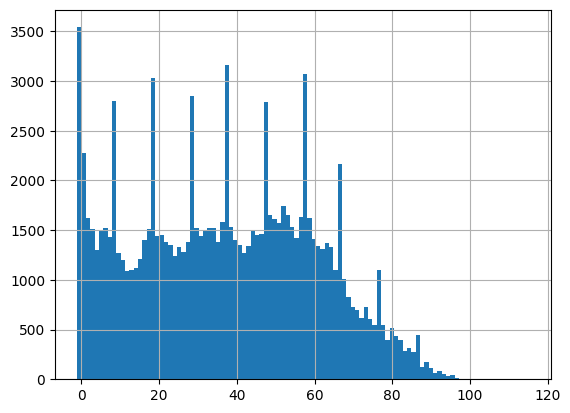

In [703]:
#plotando o histograma de algumas variáveis 
df_consultas['Age'].hist(bins=len(df_consultas['Age'].unique()))

<AxesSubplot: >

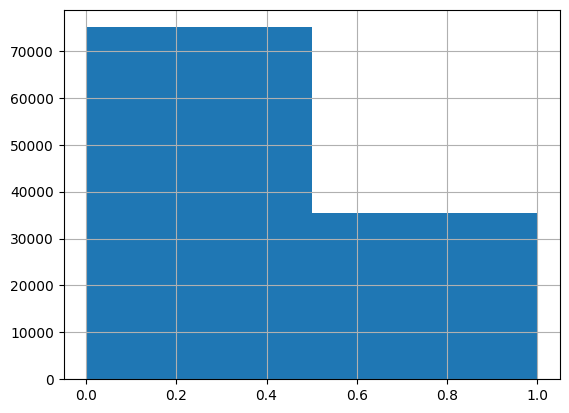

In [704]:
df_consultas['SMS_received'].hist(bins=len(df_consultas['SMS_received'].unique()))

In [705]:
df_consultas['SMS_received'].unique()

array([0, 1])

**Quantos valores diferentes encontramos para a vairável dos SMS recebidos (SMS_received)?**

Dois, 0 e 1

In [706]:
#criando uma nova coluna -> Tempo de espera (diferença entre a data em que a consulta foi agendada e o dia da consulta)
df_consultas.ScheduledDay=pd.to_datetime(df_consultas.ScheduledDay)  #transformando as colunas par o tipo datetime
df_consultas.AppointmentDay=pd.to_datetime(df_consultas.AppointmentDay)

In [707]:
#Encontra a diferença entre o momento da marcação da consulta e o dia da consulta
tempo_espera=df_consultas.ScheduledDay-df_consultas.AppointmentDay

In [708]:
tempo_espera[:10]

0     0 days 18:38:08
1     0 days 16:08:27
2     0 days 16:19:04
3     0 days 17:29:31
4     0 days 16:07:23
5   -2 days +08:36:51
6   -2 days +15:05:12
7   -2 days +15:39:58
8     0 days 08:02:16
9   -2 days +12:48:25
dtype: timedelta64[ns]

In [709]:
df_consultas['AwaitingTime']=tempo_espera.apply(lambda x: x.days) #transforma os valores em dias 

In [710]:
df_consultas.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,-2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2


In [711]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Iniciando o tratamento dos dados**

**Qual é a menor e maior idade, respectivamente, presente no dataset?**

Menor: -1

Maior: 115

In [712]:
#Encontrando as idades negativas
df_consultas[df_consultas['Age'] < 0]['Age'].value_counts()

-1    1
Name: Age, dtype: int64

In [713]:
#filtrando apenas idades maiores que 0
df_consultas_filtrado=df_consultas[df_consultas['Age']>=0]
df_consultas_filtrado.shape

(110526, 15)

**Quantos valores de idade menores do que 0 existem no dataframe?**

Um

In [714]:
#transformando os tempo de espera para um valor não negativo
df_consultas_filtrado.loc['AwaitingTime'] = df_consultas_filtrado['AwaitingTime'].apply(lambda x: abs(x))

In [715]:
df_consultas_filtrado.isnull().sum()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
AwaitingTime      1
dtype: int64

In [716]:
df_consultas_filtrado.dropna(inplace=True)

In [717]:
df_consultas_filtrado.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
AwaitingTime      0
dtype: int64

In [718]:
df_consultas_filtrado.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,0.0
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,0.0


In [719]:
#aplicando a transformação para os dados categóricos
categoricas=['Neighbourhood','Gender','No-show']
for coluna in categoricas:
  df_consultas_filtrado[coluna]=pd.Categorical(df_consultas_filtrado[coluna]).codes


In [720]:
df_consultas_filtrado.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903.0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,39,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
1,5.589978e+14,5642503.0,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,4.262962e+12,5642549.0,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,8.679512e+11,5642828.0,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,8.841186e+12,5642494.0,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,39,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0
5,9.598513e+13,5626772.0,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.0,58,0.0,1.0,0.0,0.0,0.0,0.0,0,-2.0
6,7.336882e+14,5630279.0,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,25,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.0
7,3.449833e+12,5630575.0,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,25,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.0


**Qual o tipo de transformação foi utilizada?**

Transformaram-se os dados que eram texto em código numérico pela técnica de Label encoding.

Text(0, 0.5, 'Frequência')

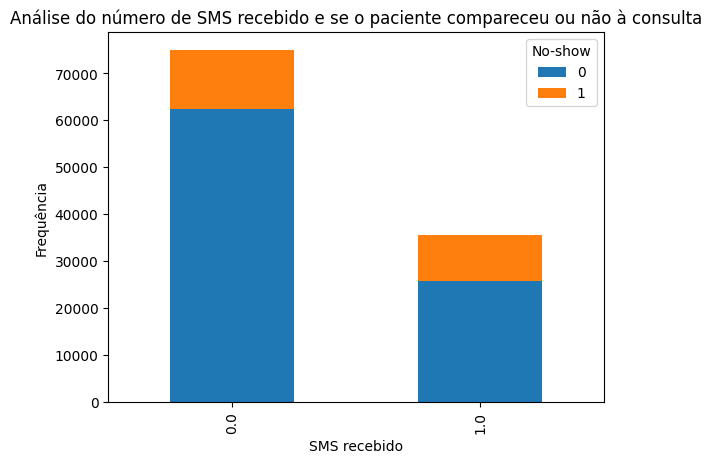

In [721]:
#analisando os SMS enviados e o número de vezes que o paciente compareceu ou não 
sms_x_comparecer = df_consultas_filtrado.groupby(['SMS_received', 'No-show'])['SMS_received'].count().unstack('No-show').fillna(0)
sms_x_comparecer[[0, 1]].plot(kind='bar', stacked=True) 
plt.title('Análise do número de SMS recebido e se o paciente compareceu ou não à consulta') 
plt.xlabel('SMS recebido') 
plt.ylabel('Frequência')

In [722]:
sms_x_comparecer

No-show,0,1
SMS_received,,
0.0,62509,12535
1.0,25698,9784


In [723]:
#Qual é a proporção de pacientes que receberam o sms e NÃO compareceram?
9784 / (25698 + 9784)

0.27574544839637

In [724]:
#Qual é a proporção de pacientes que NÃO receberam o sms e NÃO compareceram?
12535 / (62509 + 12535)

0.16703533926762965

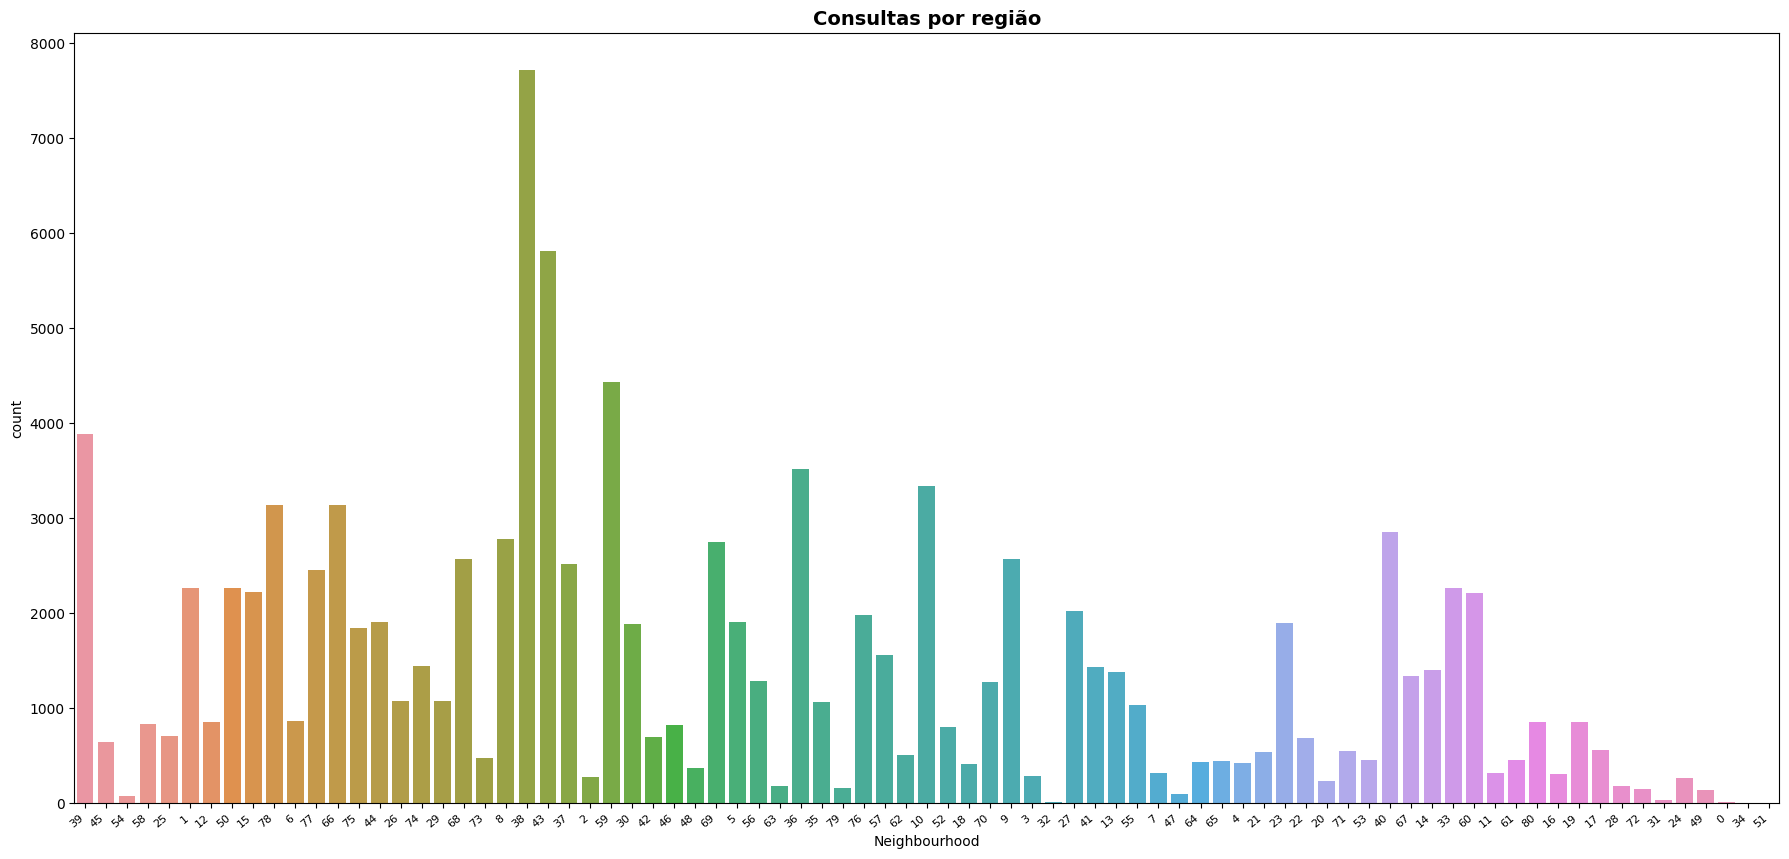

In [725]:
#plotando o número de consultas por região 
regioes = df_consultas_filtrado['Neighbourhood'].unique()
plt.figure(figsize=(22,10))
ax = sns.countplot(x='Neighbourhood', data=df_consultas_filtrado, order=regioes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Consultas por região', fontsize=14, fontweight='bold')
plt.show()

**Qual região possui o maior número de consultas marcadas?**

Região 38

In [726]:
#selecionando os dados para a construção da previsão
entradas = ['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','AwaitingTime']
saida=['No-show']

In [727]:
x=df_consultas_filtrado[entradas]
y=df_consultas_filtrado[saida]

In [728]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [729]:
x_train.shape

(77368, 9)

In [730]:
x_test.shape

(33158, 9)

In [731]:
#aplicando um modelo de classificação via árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier() 
clf_arvore.fit(x_train, y_train) 

DecisionTreeClassifier()

In [732]:
#realiza a previsão com os dados
y_previsto = clf_arvore.predict(x_test) 

In [733]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_previsto)
acuracia

0.7332770372157549

In [734]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[22232  4253]
 [ 4591  2082]]


In [735]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     26485
           1       0.33      0.31      0.32      6673

    accuracy                           0.73     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.73      0.73     33158



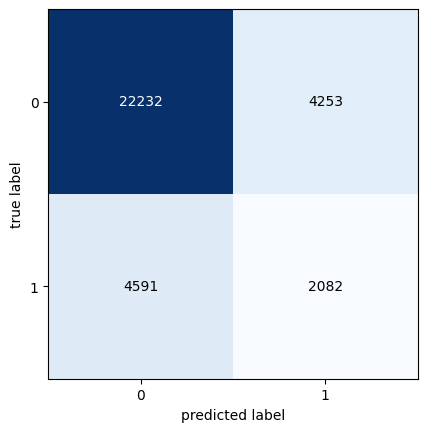

In [736]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()